In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

print(wego.shape)
wego.head()

(350329, 30)


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [69]:
wego_clean = wego.dropna(subset = ['ADHERENCE', 'ACTUAL_DEPARTURE_TIME', 'SCHEDULED_TIME'])
wego_clean.shape

(338861, 30)

In [82]:
wego.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              11
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           11459
ACTUAL_DEPARTURE_TIME         11468
ADHERENCE                     11468
SCHEDULED_HDWY                75591
ACTUAL_HDWY                   84267
HDWY_DEV                      84436
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED     70329
IS_RELIEF                   

In [73]:
wego_clean.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE               5
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME               3
ACTUAL_DEPARTURE_TIME             0
ADHERENCE                         0
SCHEDULED_HDWY                72749
ACTUAL_HDWY                   72799
HDWY_DEV                      72968
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED     67698
IS_RELIEF                   

In [23]:
# Cleaning is unecessary as the three columns being looked at have the same length w/o nulls

# wego_clean['SCHEDULED_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])
# wego_clean['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego_clean['ACTUAL_DEPARTURE_TIME'])
# wego_clean.info()

In [24]:
# wego_clean['ADHERENCE'] = wego_clean['ADHERENCE'].astype(int)
# wego_clean['ADHERENCE']

In [ ]:
# wego_clean.reset_index(drop=True, inplace=True)
# wego_clean.head()

In [ ]:
# wego_clean.info()

In [90]:
len(wego['ADHERENCE'])

350329

#### 1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [93]:
# Logic: README explicitly recommends using ADJUSTED_ONTIME_COUNT, ADJUSTED_EARLY_COUNT, AND ADJUSTED_LATE_COUNT. A trip with trip_edge = 2 is technically counted 
# as on-time if early since it is the end of the trip. This would be counted as ADJUSTED_ONTIME_COUNT = 1. Utilizing the ADHERENCE column and setting thresholds of -6 and +1 will give
# differenct percentages.

# sum adjusted counts for ontime, early, and late
ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()
early = wego['ADJUSTED_EARLY_COUNT'].sum()
late = wego['ADJUSTED_LATE_COUNT'].sum()

print(f"On-Time Count: {ontime:}")
print(f"Early Count: {early:}")
print(f"Late Count: {late:}")

# total trips
total = ontime + early + late
print(f"Total Records {total:}")

# ontime performance percentage
ontime_performance = (ontime / total) * 100

# early performance percentage
early_performance = (early / total) * 100

# late performance percentage
late_performance = (late / total) * 100

print(f"Overall On-Time Performance: {ontime_performance:.2f}%")
print(f"Overall Early Performance: {early_performance:.2f}%")
print(f"Overall Late Performance: {late_performance:.2f}%")

On-Time Count: 270048
Early Count: 9775
Late Count: 59038
Total Records 338861
Overall On-Time Performance: 79.69%
Overall Early Performance: 2.88%
Overall Late Performance: 17.42%


In [100]:
# wego = wego.dropna(subset = ['ADHERENCE'])
# wego.shape

(338861, 30)

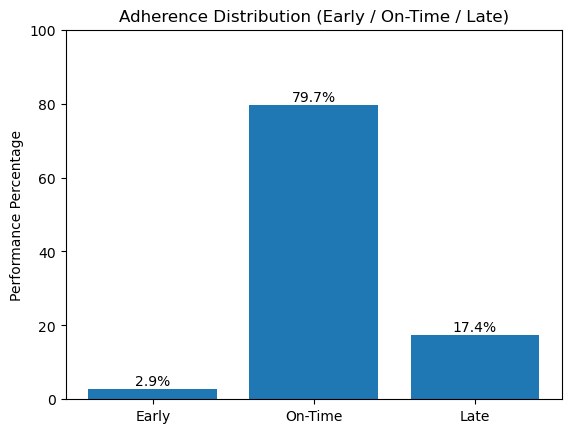

In [26]:
pct = {
    "Early": early_performance,
    "On-Time": ontime_performance,
    "Late": late_performance
}

labels, values = zip(*pct.items())

plt.figure()
plt.bar(labels, values)
plt.ylabel("Performance Percentage")
plt.title("Adherence Distribution (Early / On-Time / Late)")
plt.ylim(0, 100)
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.savefig('adherence_distribution.png')

plt.show()

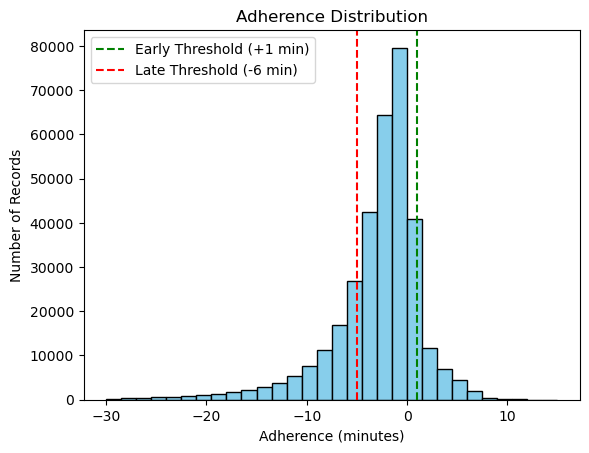

In [27]:
adherence_values = wego["ADHERENCE"].dropna()
filtered_adherence = adherence_values[(adherence_values > -30) & (adherence_values < 15)]

plt.hist(filtered_adherence, bins=30, color = 'skyblue', edgecolor = 'black')
plt.title("Adherence Distribution")
plt.xlabel("Adherence (minutes)")
plt.ylabel("Number of Records")

plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (+1 min)')
plt.axvline(x=-5, color='red', linestyle='--', label='Late Threshold (-6 min)')
plt.legend()

plt.savefig('adherence_dist_histogram.png')

plt.show()

In [ ]:
adherence_route_mean = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean().reset_index()
adherence_route_mean = pd.DataFrame(adherence_route_mean)
adherence_route_mean

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(adherence_route_mean['ROUTE_ABBR'].astype(str), adherence_route_mean['ADHERENCE'] , color='skyblue', edgecolor='black')
plt.title('Average Adherence by Route')
plt.xlabel('Route')
plt.ylabel('Average Adherence (minutes)')
plt.show()

In [ ]:
wego['ADHERENCE'].describe()

#### 2. How does direction of travel, route, or location affect the on-time performance?

In [ ]:
# Group by route and sum adjusted counts
route_group = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}) 

# Calculate total trips per route
route_group['Total Trips'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] + 
    route_group['ADJUSTED_LATE_COUNT'] + 
    route_group['ADJUSTED_EARLY_COUNT']
)

# Calculate on-time percentage
route_group['On-Time Pct'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] / route_group['Total Trips']
) * 100

# Show top and bottom routes by on-time performance
route_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

In [11]:
wego['ROUTE_DIRECTION_NAME'].unique()
wego['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [18]:
# Group by direction and calculate adjusted on-time performance
direction_group = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# calculate total trips per direction (to downtown / from downtown)
direction_group['dir_total_trips'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] + 
    direction_group['ADJUSTED_LATE_COUNT'] + 
    direction_group['ADJUSTED_EARLY_COUNT']
)

# Calculate percentage
direction_group['On-Time Pct'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] / direction_group['dir_total_trips']
) * 100

direction_group['Early Pct'] = (
    direction_group['ADJUSTED_EARLY_COUNT'] / direction_group['dir_total_trips']
) * 100

direction_group['Late Pct'] = (
    direction_group['ADJUSTED_LATE_COUNT'] / direction_group['dir_total_trips']
) * 100
   
direction_group.sort_values('On-Time Pct', ascending=False).reset_index()

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,dir_total_trips,On-Time Pct,Early Pct,Late Pct
0,TO DOWNTOWN,135634,19437,4484,159555,85.007678,2.810316,12.182006
1,FROM DOWNTOWN,134414,39601,5291,179306,74.963470,2.950822,22.085708


In [ ]:
# by location
location_group = wego.groupby('TIME_POINT_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# Calculate total trips per location
location_group['loc_total_trips'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] + 
    location_group['ADJUSTED_LATE_COUNT'] + 
    location_group['ADJUSTED_EARLY_COUNT']
)

location_group['On-Time Pct'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] / location_group['loc_total_trips']
) * 100

# Show locations with best and worst on-time performance
location_group.sort_values('On-Time Pct', ascending=False).reset_index()

In [ ]:
# top_direction = direction_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_direction, x='ROUTE_DIRECTION_NAME', y='On-Time Pct')
# plt.title('')
# plt.ylabel('On-Time Percentage')
# plt.xlabel('Direction')
# plt.ylim(0, 100)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

In [ ]:
top_routes = route_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='ROUTE_ABBR', y='On-Time Pct')
plt.title('Top 10 Routes by On-Time Performance')
plt.ylabel('On-Time Percentage')
plt.xlabel('Route')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('top_10_routes_ontime_perf.png')

plt.show()

In [ ]:
# top_location = location_group.sort_values('On-Time Pct', ascending=False).head(10).reset_index()

# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_location, x='TIME_POINT_ABBR', y='On-Time Pct')
# plt.title('Top 10 Locations by On-Time Performance')
# plt.ylabel('On-Time Percentage')
# plt.xlabel('Route')
# plt.ylim(0, 100)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

### 3. How does time of day or day of week affect on-time performance?

In [ ]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'])

wego['weekday'] = wego['SCHEDULED_TIME'].dt.day_name()
wego['hour'] = wego['SCHEDULED_TIME'].dt.hour

In [ ]:
wego['total_trips'] = (
    wego['ADJUSTED_EARLY_COUNT'] +
    wego['ADJUSTED_LATE_COUNT'] +
    wego['ADJUSTED_ONTIME_COUNT']
)

wego = wego[wego['total_trips'] > 0].copy()

print(wego['total_trips'])

In [ ]:
wego['on_time_pct'] = (
    wego['ADJUSTED_ONTIME_COUNT'] / wego['total_trips'] * 100
)

# 5. Group by hour and weekday
hour_perf = wego.groupby('hour')['on_time_pct'].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_perf = wego.groupby('weekday')['on_time_pct'].mean().reindex(weekday_order)

hour_perf

In [ ]:
# Hourly plot
plt.figure(figsize=(10, 5))
hour_perf.plot(marker='o')
plt.title('Average On-Time Percentage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('On-Time Percentage (%)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Weekly plot
plt.figure(figsize=(10, 5))
weekday_perf.plot(kind='bar')
plt.title('Average On-Time Percentage by Day of Week')
plt.xlabel('Day')
plt.ylabel('On-Time Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 5. Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

In [ ]:
#1. Take a look at ADHERENCE and HDWY_DEV
wego['ADHERENCE'].isna().sum()

In [ ]:
wego['HDWY_DEV'].isna().sum()

In [83]:
# 2. Drop NA, create correlation variable
wego_corr = wego[['ADHERENCE', 'HDWY_DEV']].dropna().reset_index(drop=True)
wego_corr

,ADHERENCE,HDWY_DEV
0,-1.716666,2.666666
1,-1.916666,1.966666
2,-0.183333,-0.483334
3,-1.316666,-2.166667
4,1.500000,-3.883334
...,...,...
265888,-5.900000,6.716666
265889,-8.616666,4.916666
265890,-8.433333,5.266666
265891,-4.316666,1.866666


In [84]:
#3. Correlation
wego_adhdev_corr = wego_corr['ADHERENCE'].corr(wego_corr['HDWY_DEV'])

In [85]:
print(f'Correlation between ADHERENCE and HDWY_DEV: {wego_adhdev_corr:.2f}')

Correlation between ADHERENCE and HDWY_DEV: -0.21


In [86]:
# pearson correlation, r-value p-value
from scipy import stats
pearson_corr, p_value = stats.pearsonr(wego_corr['ADHERENCE'], wego_corr['HDWY_DEV'])

print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: -0.207
P-value: 0.000


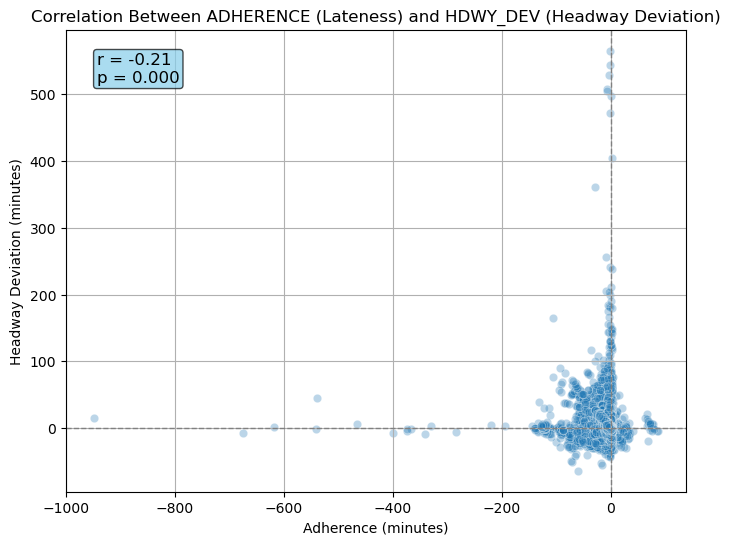

In [88]:
# 4. Scatterplot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=wego_corr, x='ADHERENCE', y='HDWY_DEV', alpha=0.3)
plt.title('Correlation Between ADHERENCE (Lateness) and HDWY_DEV (Headway Deviation)')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Headway Deviation (minutes)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)


plt.text(0.05, 0.95, f'r = {pearson_corr:.2f}\np = {p_value:.3f}', transform=ax.transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment = 'left', bbox=dict(boxstyle='round,pad=0.2', fc='skyblue', alpha=0.7))

# plt.savefig('corr_adherence_hdwydev.png')

plt.show()

## Interpretation: Most data points are clustered near the origin, suggesting that most buses are close to being on time and have low headway deviation. There are some outliers with extreme lateness and high deviation.
## This suggests that worse adherence (lateness) is associated with more irregular spacing between buses, which could impact service reliability. However, the correlation (-0.21) is weak, so other factors may also
## be influencing headway deviation.

In [ ]:
# Scatter plot with regression line. Doesn't look all that great.

# sns.set(style="whitegrid")
# sns.lmplot(
#     x="ADHERENCE",
#     y="HDWY_DEV",
#     data=wego_corr,
#     scatter_kws={"alpha": 0.3},
#     height=5,
#     aspect=1.5,
#     line_kws={"color": "red"}
# )
# plt.title("Linear Trend: Adherence vs. Headway Deviation")
# plt.xlabel("Adherence (minutes)")
# plt.ylabel("Headway Deviation (minutes)")
# plt.tight_layout()
# plt.show()

### Question 5: Setting PREV_SCHED_STOP_CANCELLED == 0 as PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour. Does not drastically change the correlation. Will likely stick with the original analysis and scatterplot.

In [ ]:
wego_corr_2 = wego[['ADHERENCE', 'HDWY_DEV', 'PREV_SCHED_STOP_CANCELLED']].dropna().reset_index(drop=True)
wego_corr_2.shape

In [ ]:
# wego_corr_2_clean = wego_corr_2[wego_corr_2['PREV_SCHED_STOP_CANCELLED'] == 0]
# wego_corr_2_clean.shape

In [ ]:
# wego_corr_2_pearson = wego_corr_2_clean['ADHERENCE'].corr(wego_corr_2_clean['HDWY_DEV'], method = 'pearson')
# print(wego_corr_2_pearson)

# wego_corr_2_spearman = wego_corr_2_clean['ADHERENCE'].corr(wego_corr_2_clean['HDWY_DEV'], method = 'spearman')
# print(wego_corr_2_spearman)

# pearson_corr, p_value = stats.pearsonr(wego_corr_2_clean['ADHERENCE'], wego_corr_2_clean['HDWY_DEV'])

# print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
# print(f"P-value: {p_value:.3f}")

In [ ]:
# # plt.figure(figsize=(8, 6))
# ax = sns.scatterplot(data=wego_corr_2_clean, x='ADHERENCE', y='HDWY_DEV', alpha=0.5)
# plt.title('Correlation Between ADHERENCE (Lateness) and HDWY_DEV (Headway Deviation)')
# plt.xlabel('Adherence (minutes)')
# plt.ylabel('Headway Deviation (minutes)')
# plt.axhline(0, color='black', linestyle='--', linewidth=1)
# plt.axvline(0, color='black', linestyle='--', linewidth=1)
# plt.grid(True)


# plt.text(0.05, 0.95, f'r = {pearson_corr:.2f}\np = {p_value:.3f}', transform=ax.transAxes,
#          fontsize=12, verticalalignment='top', horizontalalignment = 'left', bbox=dict(boxstyle='round,pad=0.2', fc='skyblue', alpha=0.7))

# # # plt.savefig('corr_adherence_hdwydev.png')

# plt.show()

### 8. What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

In [20]:
# 1. Drop NA for ADHERENCE and ROUTE_STOP_SEQUENCE
wego_filter = wego[['ADHERENCE', 'ROUTE_STOP_SEQUENCE']].dropna()

In [21]:
# 2. Groupby ROUTE_STOP_SEQUENCE, calculate mean and standard deviation of adherence
adherence_stats = wego_filter.groupby('ROUTE_STOP_SEQUENCE')['ADHERENCE'].agg(['mean', 'std']).reset_index()

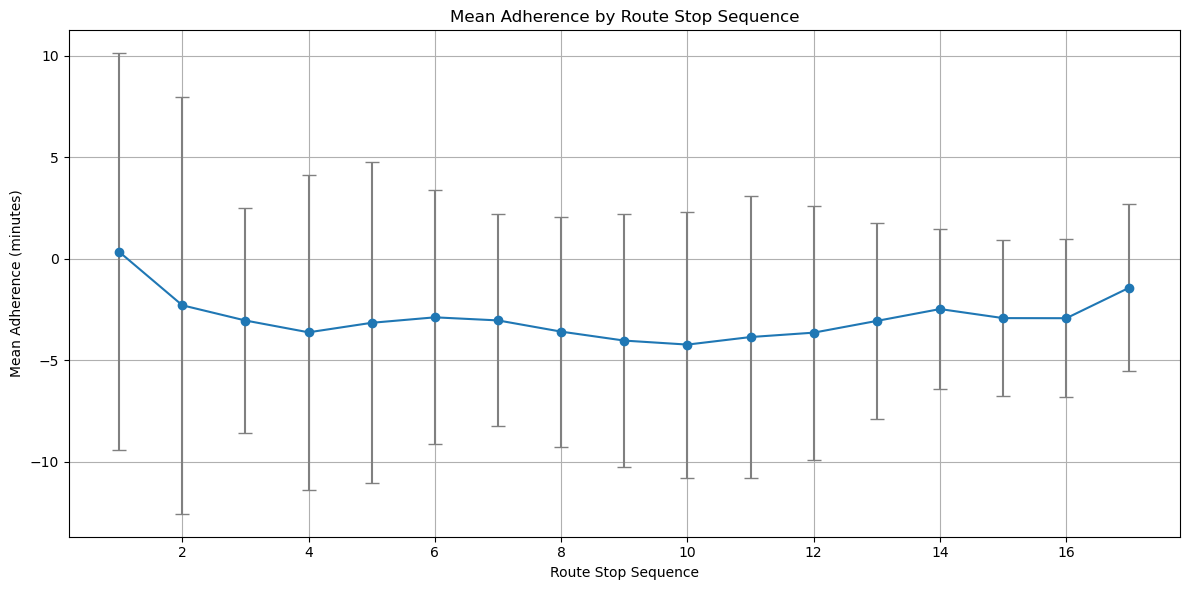

In [22]:
# Plot mean adherence with standard deviation
plt.figure(figsize=(12, 6))
plt.errorbar(
    adherence_stats['ROUTE_STOP_SEQUENCE'],
    adherence_stats['mean'],
    yerr=adherence_stats['std'],  # assuming 'std' column contains standard deviation
    fmt='o-',                # line with circle markers
    ecolor='gray',           # color of error bars
    capsize=5                # adds caps to error bars
)
plt.title('Mean Adherence by Route Stop Sequence')
plt.xlabel('Route Stop Sequence')
plt.ylabel('Mean Adherence (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'])
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'])

In [ ]:
wego['ST_HOUR']

In [45]:
wego.sort_values(by = ['TRIP_ID', 'SCHEDULED_TIME'], inplace = True)

In [47]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350329 entries, 0 to 346170
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64      

In [52]:
import numpy as np

# Haversine function to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

# Sort your data by route and stop sequence
wego_stats_sorted = wego.sort_values(by=['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE'])

# Calculate distance between consecutive stops
wego_stats_sorted['distance_km'] = haversine(
    wego_stats_sorted['LATITUDE'].shift(),
    wego_stats_sorted['LONGITUDE'].shift(),
    wego_stats_sorted['LATITUDE'],
    wego_stats_sorted['LONGITUDE']
)

# Optional: Reset index if needed
wego_stats_sorted.reset_index(drop=True, inplace=True)

# Preview result
print(wego_stats_sorted[['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE', 'distance_km']]).head(20)


        ROUTE_ABBR  ROUTE_STOP_SEQUENCE  distance_km
0                3                  2.0          NaN
1                3                  2.0     0.000000
2                3                  2.0     0.000000
3                3                  2.0     0.000000
4                3                  2.0     0.000000
...            ...                  ...          ...
350324          56                  NaN     0.000000
350325          56                  NaN     0.000000
350326          56                  NaN    16.729992
350327          56                  NaN     0.000000
350328          56                  NaN    16.729992

[350329 rows x 3 columns]


AttributeError: 'NoneType' object has no attribute 'head'